In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics, decomposition, preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

sns.set()

# We load our data and visualize the first 50 lines.
data = pd.read_csv ("cleaned_data_films.csv")
data.head(100)

,color,director_name,num_critic_for_reviews,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,num_user_for_reviews,language,country,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,English,USA,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,2012.0,8.5
4,Color,Andrew Stanton,462.0,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,2012.0,6.6
5,Color,Sam Raimi,392.0,156.0,James Franco,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,Kirsten Dunst,sandman|spider man|symbiote|venom|villain,1902.0,English,USA,2007.0,6.2
6,Color,Nathan Greno,324.0,100.0,Donna Murphy,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,M.C. Gainey,17th century|based on fairy tale|disney|flower...,387.0,English,USA,2010.0,7.8
7,Color,Joss Whedon,635.0,141.0,Robert Downey Jr.,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,Scarlett Johansson,artificial intelligence|based on comic book|ca...,1117.0,English,USA,2015.0,7.5
8,Color,David Yates,375.0,153.0,Daniel Radcliffe,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,Rupert Grint,blood|book|love|potion|professor,973.0,English,UK,2009.0,7.5
9,Color,Zack Snyder,673.0,183.0,Lauren Cohan,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,Alan D. Purwin,based on comic book|batman|sequel to a reboot|...,3018.0,English,USA,2016.0,6.9


In [2]:
# One hot encoding

# For the genre, we only take the 8 most represented genres in our dataset
liste_genres = set()
for g in data['genres'].str.split('|'):
    liste_genres = set().union(g, liste_genres)
    
liste_genres = list(liste_genres)

for genre in liste_genres:
    if genre=='Drama' or genre=='Comedy' or genre=='Romance' or genre=='Thriller'\
    or genre=='Action' or genre=='Adventure' or genre=='Crime' or genre=='Sci-Fi':
        data[genre] = data['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
    
    
# For the words of the scenario, we only take the 9 words that enjoy the most in the scenarios of the films 
liste_words = set()
for p in data['plot_keywords'].str.split('|'):
    liste_words = set().union(p, liste_words )
    
liste_words = list(liste_words)

for word in liste_words:
    if word=='love' or word=='friend' or word=='death' or word=='murder' or word=='police'\
    or word=='new york city' or word=='high school' or word=='alien':
         data[word] = data['plot_keywords'].str.contains(word).apply(lambda x:1 if x else 0)  


# For the language, we only take the 3 most represented languages in our database
liste_language = set()
for s in data['language'].str.split('|'):
    liste_language = set().union(s, liste_language)
    
liste_language = list(liste_language)

for language in liste_language:
    if language=='English' or language=='French' or language=='Spanish':
         data[language] = data['language'].str.contains(language).apply(lambda x:1 if x else 0)
            

data.head(50)

,color,director_name,num_critic_for_reviews,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,new york city,friend,love,high school,murder,alien,police,Spanish,English,French
0,Color,James Cameron,723.0,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,...,0,0,0,0,0,0,0,0,1,0
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,...,0,0,0,0,0,0,0,0,1,0
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,...,0,0,0,0,0,0,0,0,1,0
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,...,0,0,0,0,0,0,1,0,1,0
4,Color,Andrew Stanton,462.0,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,...,0,0,0,0,0,1,0,0,1,0
5,Color,Sam Raimi,392.0,156.0,James Franco,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,Kirsten Dunst,...,0,0,0,0,0,0,0,0,1,0
6,Color,Nathan Greno,324.0,100.0,Donna Murphy,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,M.C. Gainey,...,0,0,0,0,0,0,0,0,1,0
7,Color,Joss Whedon,635.0,141.0,Robert Downey Jr.,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,Scarlett Johansson,...,0,0,0,0,0,0,0,0,1,0
8,Color,David Yates,375.0,153.0,Daniel Radcliffe,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,Rupert Grint,...,0,0,1,0,0,0,0,0,1,0
9,Color,Zack Snyder,673.0,183.0,Lauren Cohan,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,Alan D. Purwin,...,0,0,0,0,0,0,0,0,1,0


In [3]:
#We implement the functions that will be useful to us for PCA

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):

    for d1, d2 in axis_ranks: # The first 3 factorial planes are displayed, so the first 6 components

        if d2 < n_comp:

            # initialisation of the figure

            fig, ax = plt.subplots(figsize=(7,6))

            # determination of chart boundaries

            if lims is not None :

                xmin, xmax, ymin, ymax = lims

            elif pcs.shape[1] < 30 :

                xmin, xmax, ymin, ymax = -1, 1, -1, 1

            else :

                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])


            # Display of arrows
            # if there are more than 30 arrows, the triangle is not displayed at the end
            if pcs.shape[1] < 30 :

                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),

                   pcs[d1,:], pcs[d2,:], angles='xy', scale_units='xy', scale=1, color="grey")
                
            else:

                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]

                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            
            # displaying variable names  

            if labels is not None:  

                for i,(x, y) in enumerate(pcs[[d1,d2]].T):

                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :

                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)

            
            # displaying the cercle

            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # definition of graphic boundaries

            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # display of horizontal and vertical lines

            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # name of axes, with the inertia percentage explained

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            plt.title("Correlations circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):

    for d1,d2 in axis_ranks:

        if d2 < n_comp:

            # initialisation of the figure       

            fig = plt.figure(figsize=(7,6))

            # displaying points

            if illustrative_var is None:

                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)

            else:

                illustrative_var = np.array(illustrative_var)

                for value in np.unique(illustrative_var):

                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)

                plt.legend()
                
                # display of point labels

            if labels is not None:

                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):

                    plt.text(x, y, labels[i], fontsize='4', ha='center',va='center') 

            # determination of chart boundaries

            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])

            # display of horizontal and vertical lines

            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # name of axes, with the inertia percentage explained

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of the individuals (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


def display_scree_plot(pca):

    scree = pca.explained_variance_ratio_*100

    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')

    plt.xlabel("Rank of the axis of inertia")
    plt.ylabel("Percentage of inertia")

    plt.title("Eigenvalues")
    plt.show(block=False)


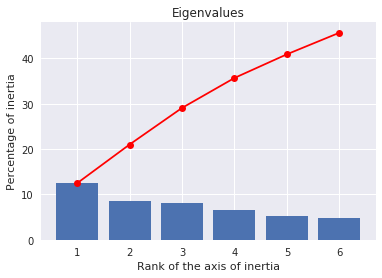

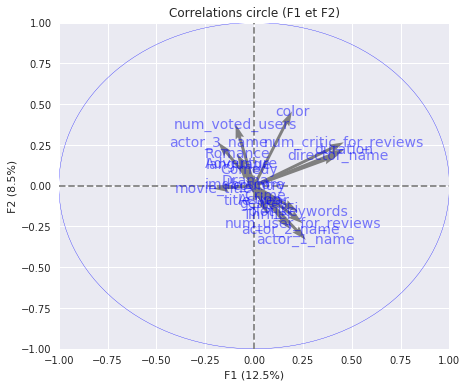

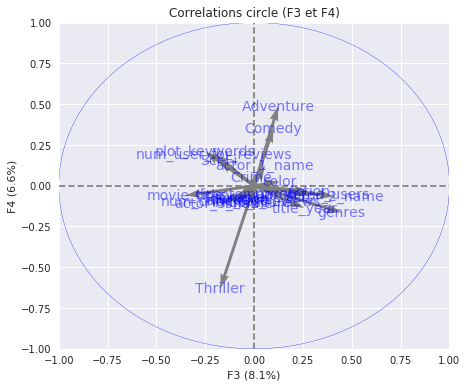

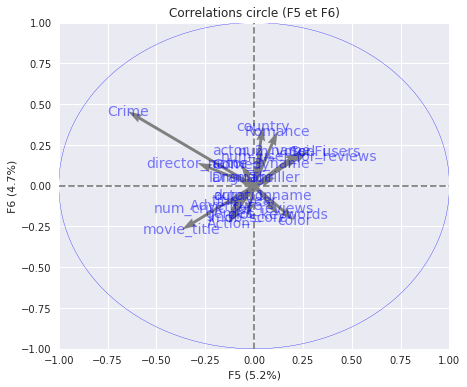

            imdb_score  num_critic_for_reviews  num_voted_users  \
component1    0.193645                0.430687         0.459159   
component2    0.455741                0.188021         0.266126   

            num_user_for_reviews  Thriller     Crime    Action    Comedy  \
component1              0.460940  0.183769  0.046315  0.264435 -0.207057   
component2              0.221233 -0.265335 -0.110425 -0.331735 -0.018825   

               Drama   Romance     ...        murder  new york city     alien  \
component1 -0.094745 -0.184379     ...      0.014423      -0.047151  0.129209   
component2  0.377322  0.266496     ...     -0.089872       0.008224 -0.136837   

            high school    police      love   Spanish   English    French  \
component1    -0.043600  0.028572 -0.087310 -0.027006  0.071803 -0.066865   
component2     0.034535 -0.081127  0.197076  0.097065 -0.176648  0.137846   

            title_year  
component1    0.057885  
component2   -0.057972  

[2 rows x 24 colu

In [4]:
# choice of the number of components to be calculated

n_comp = 6

# selection of columns to be considered in the PCA

data_pca = data[['imdb_score', 'num_critic_for_reviews', 'num_voted_users','num_user_for_reviews','Thriller',
                 'Crime', 'Action', 'Comedy', 'Drama','Romance','Adventure', 'Sci-Fi', 'friend', 'death', 'murder',
                 'new york city', 'alien', 'high school', 'police','love', 'Spanish','English', 'French', 'title_year']]

# preparation of data for PCA

X = data_pca.values
names = data.index 
features = data.columns

# standardization

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calculation of the main components

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

display_scree_plot(pca)

# Circle of the correlations

pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
pca_table = pd.DataFrame([pcs[0],pcs[1]],columns=['imdb_score', 'num_critic_for_reviews', 'num_voted_users',
                                                  'num_user_for_reviews','Thriller', 'Crime', 'Action', 'Comedy',
                                                  'Drama','Romance','Adventure', 'Sci-Fi', 'friend', 'death', 'murder',
                                                  'new york city', 'alien', 'high school', 'police','love', 'Spanish',
                                                  'English', 'French', 'title_year'],index=['component1', 'component2'])
print(pca_table)
plt.show()



In [5]:
# Normalize the data of our two variables imdb_score and num_voted_users

data['imdb_score_norm'] = (data['imdb_score']-min(data['imdb_score']))/(max(data['imdb_score'])-min(data['imdb_score']))
data['num_voted_users_norm'] = (data['num_voted_users']-min(data['num_voted_users']))/(max(data['num_voted_users'])-
                                                                                  min(data['num_voted_users']))
data['title_year_norm'] = (data['title_year']-min(data['title_year']))/(max(data['title_year'])-min(data['title_year']))


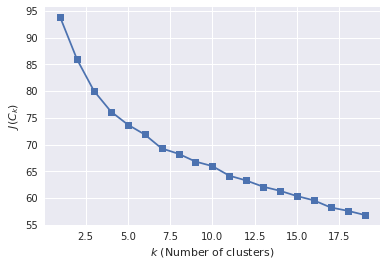

In [6]:
x = data[['imdb_score_norm','num_voted_users_norm','Thriller', 'Crime', 'Action', 'Comedy', 'Drama','Romance','Adventure', 
          'Sci-Fi', 'friend', 'death', 'murder','new york city', 'alien', 'high school', 'police','love','title_year_norm',
          'Spanish','English', 'French']]

#K-means clustering
# Graph showing the evolution of the square root of the sum of squared distances
# of samples to their closest cluster center, depending on number of cluster (k)
inertia = []
for k in range(1,20):
    model = KMeans(n_clusters=k, random_state=0).fit(x)
    inertia.append(np.sqrt(model.inertia_))
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$ (Number of clusters)')
plt.ylabel('$J(C_k)$');

# We notice that J(ck) decreases significantly until 13 clusters then it decreases more slowly.
# Thus the optimal number of clusters is 13 (elbow method)


In [7]:
# K-means clustering
# adapt the data model
kmeans = KMeans(n_clusters=13,  random_state=0).fit(x)

# index sorted out by the groups
idk = np.argsort(kmeans.labels_)

#displaying indexes of films and their groups
print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))

#distance to film class centres
distance = kmeans.transform(x)
    

       0
0      0
0   2200
0   2230
0    439
0   2289
0   2348
0   2375
0   2389
0   2398
0    427
0    426
0    422
0    421
0   2422
0   2435
0    414
0   2465
0    405
0    404
0   2522
0    402
0    390
0   2627
0   2691
0   2704
0   2709
0   2197
0   2129
0   2114
0   2097
..   ...
12  4133
12  1044
12  3805
12  4444
12  4084
12  3402
12  3553
12  3542
12  3540
12  4004
12  3524
12  4603
12   796
12  1837
12  1375
12  4018
12  2041
12  2548
12  4022
12   493
12  2555
12  4041
12  3440
12  3436
12  4055
12  3424
12  2337
12  4472
12  3466
12  4385

[4766 rows x 1 columns]


In [8]:
from fuzzywuzzy import fuzz

def sequel(id_1, id_2):
    ''' Function allowing to identify the film sequels
    
    '''

    if fuzz.ratio(data["movie_title"][id_1], data["movie_title"][id_2]) > 50 or \
    fuzz.token_set_ratio(data["movie_title"][id_1], data["movie_title"][id_2]) > 50:
        
        return True
    
    else:
        
        return False

In [9]:
def remove_sequels(film_selection):   
    ''' It deletes movie sequels from the final movie list,
        while keeping the oldest sequel.
   '''
    
    removed_from_selection = []
    for i, idfilm_1 in enumerate(film_selection):
        
        for j, idfilm_2 in enumerate(film_selection):
            
            if j <= i: continue 
                
            # keep the oldest movie
            if sequel(idfilm_1, idfilm_2):
            
                last_film = idfilm_2 if data["title_year"][idfilm_1] < data["title_year"][idfilm_2] else idfilm_1
                removed_from_selection.append(last_film)

    film_list = [film for film in film_selection if film not in removed_from_selection]
    

    return film_list   

In [10]:
def recommendation_kmeans(id_film):
    ''' Main function that allows us to make the recommendation using the Kmeans algorithm
    '''
    
    classe_film = kmeans.labels_[id_film]
    film_distance = []
    film_selection = []
    index = []
    
# We compare the distance between the film filled in and the other films present in the same cluster
#that the film filled in
    for i in data.index[kmeans.labels_==classe_film]:
        
        if i != id_film:
            
            item = abs(distance[i][classe_film]-distance[id_film][classe_film])
            film_distance.append(item)
            index.append(i+item)

        
    film_distance = np.sort(film_distance)
    index = np.sort(index)
    
    
    for id_film, dist in zip(index[0:10], film_distance[0:10]):
        
        film_selection.append(int(id_film-dist))
        
        
    film_selection = remove_sequels(film_selection)
    film_liste = [data["movie_title"][film].replace('\xa0', '') for film in film_selection]
        
    return film_liste[:5]
    

In [11]:
# id=40 corresponds to the movie Cars 2  
recommendation_kmeans(40)

['Monsters University', 'Toy Story 3', 'The Good Dinosaur', 'Brave', 'Up']

In [12]:
# main function of which allows us to make the recommendation using the knn algorithm

def recommendation_knn(id_film):
 
    from sklearn.neighbors import NearestNeighbors
    
    x1 = ['imdb_score_norm','num_voted_users_norm','Thriller', 'Crime', 'Action', 'Comedy', 'Drama','Romance','Adventure',
          'Sci-Fi', 'friend', 'death', 'murder','new york city', 'alien', 'high school', 'police','love','Spanish',
          'English', 'French', 'title_year_norm']
    
    x2 = data.as_matrix(x1)
    
    nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto', metric='euclidean').fit(x2)

    xtest = data.iloc[id_film].as_matrix(x1)
    xtest = xtest.reshape(1, -1)
    distances, film_selection2 = nbrs.kneighbors(xtest)
    
    film_selection2 = np.delete(film_selection2, 0)

    film_selection2 = remove_sequels(film_selection2)
    film_list = [data["movie_title"][indice].replace('\xa0', '') for indice in film_selection2]
    
    return film_list[:5]

In [13]:
# id=40 corresponds to the movie Cars 2  
recommendation_knn(40)

['Harold & Kumar Escape from Guantanamo Bay',
 'Fun Size',
 'Antz',
 'Strange Wilderness',
 'Toy Story 2']

In [14]:
# Benchmark model

def recommendation_bete(id_film):
    
    feats = ['Drama', 'Romance', 'Comedy', 'Crime', 'Action', 'Thriller', 'Adventure', 'Sci-Fi', 'French', 'English']
    selection = []
    id_f = []
    films = []
    occurences = []
    
    for ids in data.index.values:
        id_f.append(ids/4765)
        occurence = 0
        for feat in feats:
            val = data[feat][id_film]
            val1 = data[feat][ids]
            if val == val1:
                occurence -= 1
        occurences.append(occurence)
        selection.append(occurence+(ids/4765))
    
    occurences = np.sort(occurences)
    selection = np.sort(selection)
    
    for i, j in zip(selection[2:7], occurences[2:7]):
        films.append(int((i-j)*4765))
    
    film_liste = [data["movie_title"][film].replace('\xa0', '') for film in films]
    
    return film_liste
        
        

In [15]:
# id=40 corresponds to the movie Cars 2
recommendation_bete(40)

['Green Lantern',
 'The Good Dinosaur',
 'Brave',
 'The Dark Knight',
 'Shrek Forever After']

kmeans silhouette =  0.2421295666454983


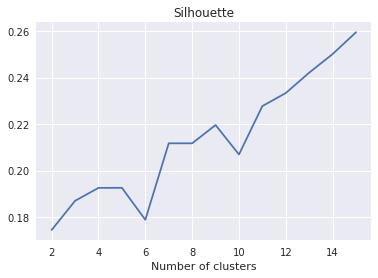

In [17]:
# Graph showing the evolution of the square root of the sum of squared distances
# of samples to their closest cluster center, depending on number of cluster (k)

res = np.arange(14,dtype="double")
for k in np.arange(14):
    
    km = KMeans(n_clusters=k+2, random_state=0)
    km.fit(x)
    res[k] = metrics.silhouette_score(x,km.labels_)
    
print("kmeans silhouette = ", res[11])

# plot

plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(2,16,1),res)
plt.show()

In [18]:
# Calculating Mean Average Precision(MAP) for each of our 2 recommendation engines
#(one using the Kmeans algorithm and the other using the knn algorithm)


films = {0:['Transformers', 'Pirates of the Caribbean','Man of Steel', 'The Da Vinci Code', 'The Avengers','Shrek','The Karate Kid'],
         1:['Sex and the City', 'Sex and the City 2', 'Lars and the Real Girl', 'Notting Hill', 'Little Fockers', 'Lars and the Real Girl', 'Pretty Woman'],
         2:['The Great Gatsby', 'Avatar', 'Dirty Dancing', 'The Notebook', 'The Twilight Saga: Breaking Dawn - Part 2', 'Pearl Harbor', '2012'],
         3:['The Fast and the Furious', 'The Mechanic', 'Lethal Weapon 3', 'Crank', 'The Italian Job', 'Lethal Weapon 4', 'Con Air'],
         4:['Avengers: Age of Ultron', 'Transformers', 'Hulk', 'Thor', 'Green Lantern', 'Captain America', 'The Wolverine'],
         5:['Kill Bill', 'Gangs of New York', 'Reservoir Dogs', 'Goodfellas', 'The Girl with the Dragon Tattoo', 'Inglourious Basterds', 'The Godfather'],
         6:['The Polar Express', 'The Dirties', 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'The Polar Express', 'Martian Child', 'Men in Black 3', 'Extract'],
         7:['Toy Story 3', 'Astro Boy', 'Monsters University', 'Up', 'Rio 2', 'Antz', 'Robots']} 

id_films = [0, 1076, 25, 2102, 16, 3259, 28, 40]
num = -1
precisions = []
precisions2 = []

for id_m in id_films:
    
    num += 1
    i = 0
    j = 0
    precision = 0
    
    for film_rec in recommendation_kmeans(id_m):
        i += 1
        
        for film in films[num]:
            
            if film == film_rec:
                j += 1
                precision += j/i
                
    precisions.append(1/5*precision)
    

MAP = 1/8*sum(precisions)
print('Mean Average Precision(MAP) for the recommendation using kmeans algorithm: ', MAP)

num = -1
for id_m in id_films:
    
    num += 1
    i = 0
    j=  0
    precision = 0
    
    for film_rec in recommendation_knn(id_m):
        i += 1
        
        for film in films[num]:
            
            if film == film_rec:
                j += 1
                precision += j/i
                
    precisions2.append(1/5*precision)
        
MAP2 = 1/8*sum(precisions2)
print('Mean Average Precision(MAP) for the recommendation using knn algorithm: ', MAP2)

# The recommendation engine running with the Kmeans algorithm has a better MAP than the one using
# the knn algorithm, so the recommendation engine working with the Kmeans algorithm is the most efficient.

Mean Average Precision(MAP) for the recommendation using kmeans algorithm:  0.15666666666666668
Mean Average Precision(MAP) for the recommendation using knn algorithm:  0.17625


In [19]:
# Calculating Mean Average Precision(MAP) for the benchmark algorithm


films = {0:['Transformers', 'Pirates of the Caribbean','Man of Steel', 'The Da Vinci Code', 'The Avengers','Shrek','The Karate Kid'],
         1:['Sex and the City', 'Sex and the City 2', 'Lars and the Real Girl', 'Notting Hill', 'Little Fockers', 'Lars and the Real Girl', 'Pretty Woman'],
         2:['The Great Gatsby', 'Avatar', 'Dirty Dancing', 'The Notebook', 'The Twilight Saga: Breaking Dawn - Part 2', 'Pearl Harbor', '2012'],
         3:['The Fast and the Furious', 'The Mechanic', 'Lethal Weapon 3', 'Crank', 'The Italian Job', 'Lethal Weapon 4', 'Con Air'],
         4:['Avengers: Age of Ultron', 'Transformers', 'Hulk', 'Thor', 'Green Lantern', 'Captain America', 'The Wolverine'],
         5:['Kill Bill', 'Gangs of New York', 'Reservoir Dogs', 'Goodfellas', 'The Girl with the Dragon Tattoo', 'Inglourious Basterds', 'The Godfather'],
         6:['The Polar Express', 'The Dirties', 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'The Polar Express', 'Martian Child', 'Men in Black 3', 'Extract'],
         7:['Toy Story 3', 'Astro Boy', 'Monsters University', 'Up', 'Rio 2', 'Antz', 'Robots']} 

id_films = [0, 1076, 25, 2102, 16, 3259, 28, 40]
num = -1
precisions2 = []

num = -1
for id_m in id_films:
    
    num += 1
    i = 0
    j=  0
    precision = 0
    
    for film_rec in recommendation_bete(id_m):
        i += 1
        
        for film in films[num]:
            
            if film == film_rec:
                j += 1
                precision += j/i
                
    precisions2.append(1/5*precision)
        
MAP3 = 1/8*sum(precisions2)
print('Mean Average Precision(MAP) for the benchmark recommendation: ', MAP3)

Mean Average Precision(MAP) for the benchmark recommendation:  0.04125
